
BRIDGING THE GAP

Alex Sloan

March 6, 2020

In [1]:
# Source:
    # http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

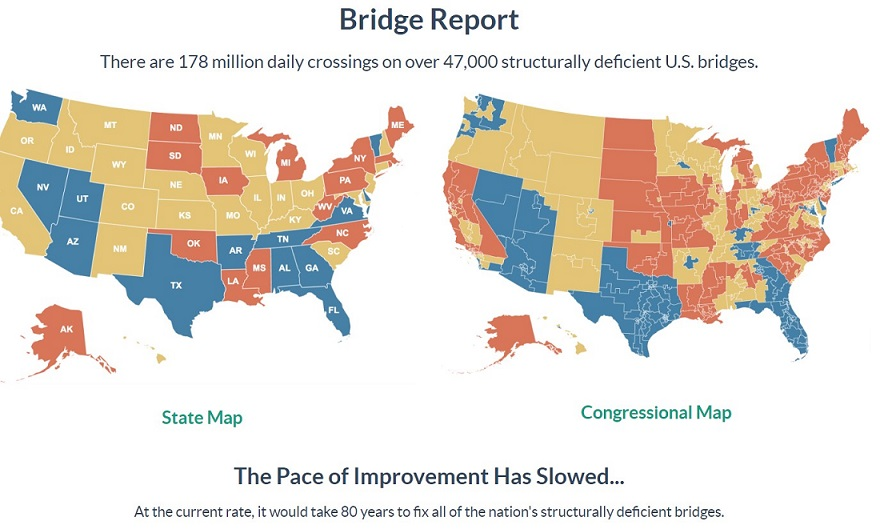

In [2]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/Bridges/master/reduced.jpg')

• 47,052 of America’s 616,087 bridges are rated “structurally deficient” and need urgent repairs

• Americans cross these deficient bridges 178 million times a day

• 235,020 (38 percent) of U.S. bridges have identified repair needs.

• 18,842 (1 in 3) Interstate highway bridges have identified repair needs

ARTBA estimatesthe cost to make the identifiedrepairs for all 235,000 bridgesis nearly $171 billion

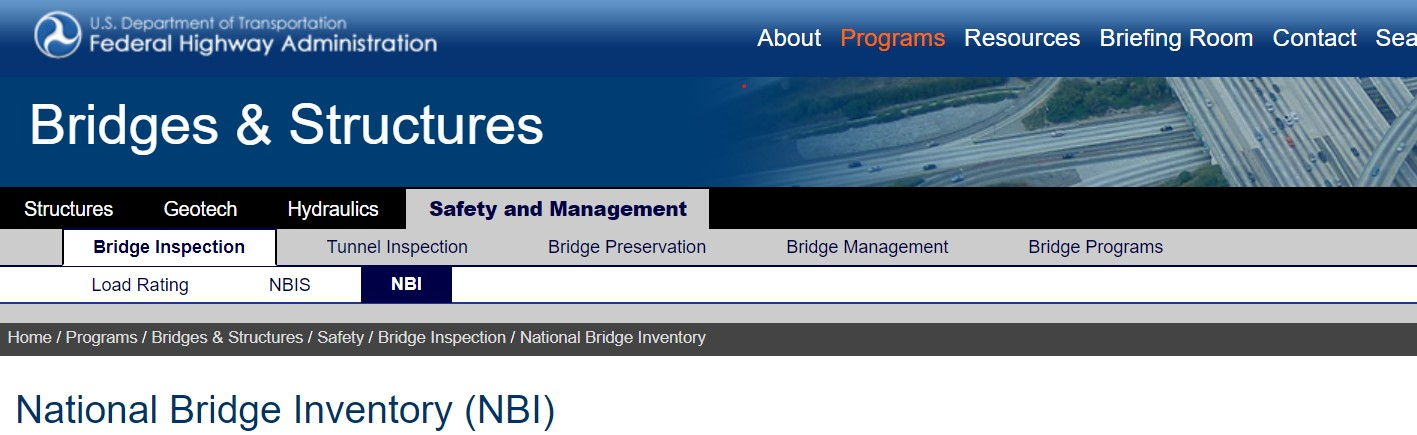

In [3]:
Image('https://raw.githubusercontent.com/AlexBB999/Bridges/master/Annotation%202020-03-04%20182737.jpg')

**The current system for inspecting bridges is expensive, time-consuming and inefficient**
The FHWA requires evaluation of all bridges however; it is costly having a bi­annual inspection cost of $2.7 billion for the U.S. 

The average inspection cost per bridge ranges from $4,500 to $10,000.
This requires closing lanes for the span of the inspection, which can take 1 to 3 days causing traffic congestions.


THE TARGET IS STRUCTURAL_EVALUATION

THIS IS HOW NBI DETERMINES IF BRIDGE IS "STRUCTURALLY DEFICIENT"

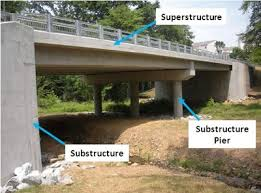

In [4]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/Bridges/master/Bridge.jpg')

**THE TARGET IS STRUCTURAL_EVALUATION**

**THIS IS HOW NBI DETERMINES IF BRIDGE IS "STRUCTURALLY DEFICIENT"**

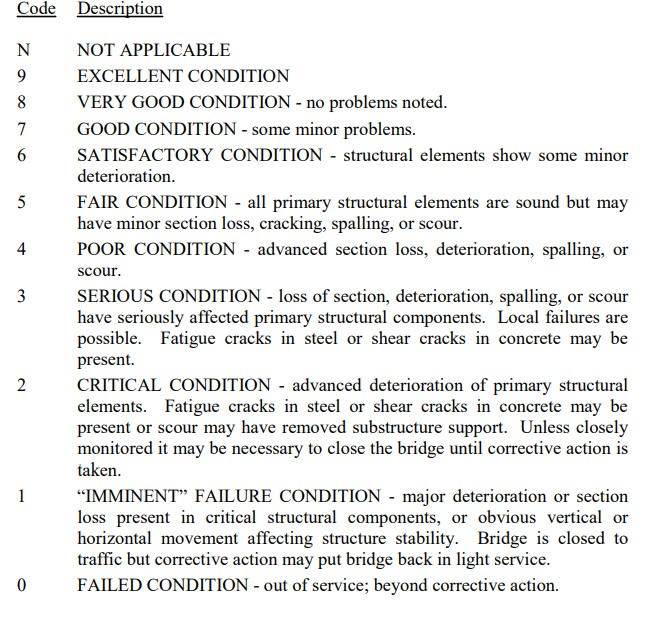

In [5]:
from IPython.display import Image

Image('https://raw.githubusercontent.com/AlexBB999/Bridges/master/minn.jpg')

The current system assigns a score called the "Structural Evaluation" to each brdge. It is a 10 point scale. A score of 4 or less marks the bridge as "Structurally Deficient" -- meaning the bridge needs repairs -- possibly replacement. It now has a priority when allocating limited funds for bridge maintenance. But the scoring of  0,1,2,3,4 is not as granular as need be. For example -- if two bridges have a score of 3 -- which one  do we repair first? If we allow decimals then we could have a score of 3.1 versus 3.5 so we know which is the first to get our limited funds.

**My objective in this project is adding granualrity/priortization to the process to help address at least part of the aforementioned shortcomings.** 

The primary stakeholders of the bridge inspection systems are the Federal Highway Administration (FHWA), District Department of Transportation (DDOT), Bridge Design Engineers, Bridge Construction Team, and the Inspection Team which are directly involved with the construction and inspection of the bridge.

The secondary stakeholders are groups of people that are not directly involved with the construction andinspection but are impacted indirectly such as the traveling public or the Bridge Users.

My immediate audience (cohorts+instructor) are secondary stakeholders. But clearly this is of value to primary stakeholders.

**IMPORT EVERYTHING I MAY USE**

In [0]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import statistics
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive

In [87]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**STAKEHOLDERS**

The stakeholders have been clearly defined in the above quoted article:

The primary stakeholders of the bridge inspection systems are the Federal
Highway Administration (FHWA), District Department of Transportation (DDOT),
Bridge Design Engineers, Bridge Construction Team, and the Inspection Team which are directly involved with the construction and inspection of the bridge. The secondary stakeholders are groups of people that are not directly involved with the construction andinspection but are impacted indirectly such as the traveling public or the Bridge Users.

**My immediate audience (cohorts+instructor+you) are secondary stakeholders. But clearly this is of value to primary stakeholders**.


#**EXPLANATION FOR COULMNS DROPPED BEFORE ANY ANALYSIS**

I am not creating a dashboard so any columns having to do with location/identification are **not** relevent at this time. Thus, I have dropped the following columns:

State_code

Record_type

Route_prefix

Route_number

Direction

Highway District

County_code

Place_code

Features_Desc

Location

Kilopoint

Base_Hwy_network

LRS_Inv_Route

Subroute

Latitude

Longitude

Detour Kilos

Cat 10

Cat 23

Without goiing into the same level of deatil , I have dropped all columns having to do with water/navigation and other irrelevant columns like Right_curb and Left_curb. I am not stating that this information is not useful -- I am simply simplifying this project. To factor in all 136 features and many subfeatures is not a project -- it's a full-time job.

In [0]:
bridges9 = pd.read_csv('/content/drive/My Drive/2017HwyBridgesDelimitedAllStates.txt', sep=',',encoding='ISO-8859-1',low_memory=False)

**IDENTIFYING FEATURES BY COLUMN NUMBER**

In [0]:
g=list(range(1,138))

In [0]:
z=zip(g,list(bridges9))

In [91]:
list(z)

[(1, 'STATE_CODE_001'),
 (2, 'STRUCTURE_NUMBER_008'),
 (3, 'RECORD_TYPE_005A'),
 (4, 'ROUTE_PREFIX_005B'),
 (5, 'SERVICE_LEVEL_005C'),
 (6, 'ROUTE_NUMBER_005D'),
 (7, 'DIRECTION_005E'),
 (8, 'HIGHWAY_DISTRICT_002'),
 (9, 'COUNTY_CODE_003'),
 (10, 'PLACE_CODE_004'),
 (11, 'FEATURES_DESC_006A'),
 (12, 'CRITICAL_FACILITY_006B'),
 (13, 'FACILITY_CARRIED_007'),
 (14, 'LOCATION_009'),
 (15, 'MIN_VERT_CLR_010'),
 (16, 'KILOPOINT_011'),
 (17, 'BASE_HWY_NETWORK_012'),
 (18, 'LRS_INV_ROUTE_013A'),
 (19, 'SUBROUTE_NO_013B'),
 (20, 'LAT_016'),
 (21, 'LONG_017'),
 (22, 'DETOUR_KILOS_019'),
 (23, 'TOLL_020'),
 (24, 'MAINTENANCE_021'),
 (25, 'OWNER_022'),
 (26, 'FUNCTIONAL_CLASS_026'),
 (27, 'YEAR_BUILT_027'),
 (28, 'TRAFFIC_LANES_ON_028A'),
 (29, 'TRAFFIC_LANES_UND_028B'),
 (30, 'ADT_029'),
 (31, 'YEAR_ADT_030'),
 (32, 'DESIGN_LOAD_031'),
 (33, 'APPR_WIDTH_MT_032'),
 (34, 'MEDIAN_CODE_033'),
 (35, 'DEGREES_SKEW_034'),
 (36, 'STRUCTURE_FLARED_035'),
 (37, 'RAILINGS_036A'),
 (38, 'TRANSITIONS_036B'),


**I HAVE ALREADY DONE SOME FEATURE SELECTION, AS NOTED ABOVE,  SO I AM NOT USING ALL 136 FEATURES**

In [0]:
bridges99=bridges9.iloc[:,[4,22,23,26,27,31,45,47,54,59,66,67,68,72,74,75,76,106,107,108,109,132]].copy()

In [93]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9


In [94]:
bridges99.shape

(615002, 22)

**I AM ONLY  LOOKING AT BRIDGES BUILT AFTER 1899** 

In [0]:
bridges99=bridges99[bridges99['YEAR_BUILT_027']>1899]

**BINNING YEAR_BUILT BY DECADE**

In [0]:
bridges99['binned']=pd.cut(bridges99['YEAR_BUILT_027'],bins=[1889,1899,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019], labels=False)

**AFTER BINNING NO NEED FOR YEAR_BUILT**

In [0]:
bridges99.drop(['YEAR_BUILT_027'],axis=1,inplace=True)

In [98]:
bridges99.shape

(613231, 22)

In [99]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned
0,1.0,3,62,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10
1,1.0,3,62,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11
2,1.0,3,74,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,5
3,1.0,3,67,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,8
4,1.0,3,67,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,4


**GET AN OVERVIEW OF OUR DATA**

In [100]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613231 entries, 0 to 615001
Data columns (total 22 columns):
SERVICE_LEVEL_005C         613228 non-null float64
TOLL_020                   613231 non-null int64
MAINTENANCE_021            613231 non-null int64
TRAFFIC_LANES_ON_028A      613227 non-null float64
DESIGN_LOAD_031            613231 non-null object
SERVICE_ON_042A            613231 non-null int64
STRUCTURE_KIND_043A        613231 non-null int64
MAX_SPAN_LEN_MT_048        613231 non-null float64
DECK_WIDTH_MT_052          613227 non-null float64
DECK_COND_058              613231 non-null object
SUPERSTRUCTURE_COND_059    613231 non-null object
SUBSTRUCTURE_COND_060      613231 non-null object
OPERATING_RATING_064       609286 non-null float64
INVENTORY_RATING_066       609322 non-null float64
STRUCTURAL_EVAL_067        613231 non-null object
DECK_GEOMETRY_EVAL_068     613231 non-null object
DECK_STRUCTURE_TYPE_107    613231 non-null object
SURFACE_TYPE_108A          613230 non

**CHECK FOR NAN**

In [101]:
bridges99.isna().sum()

SERVICE_LEVEL_005C            3
TOLL_020                      0
MAINTENANCE_021               0
TRAFFIC_LANES_ON_028A         4
DESIGN_LOAD_031               0
SERVICE_ON_042A               0
STRUCTURE_KIND_043A           0
MAX_SPAN_LEN_MT_048           0
DECK_WIDTH_MT_052             4
DECK_COND_058                 0
SUPERSTRUCTURE_COND_059       0
SUBSTRUCTURE_COND_060         0
OPERATING_RATING_064       3945
INVENTORY_RATING_066       3909
STRUCTURAL_EVAL_067           0
DECK_GEOMETRY_EVAL_068        0
DECK_STRUCTURE_TYPE_107       0
SURFACE_TYPE_108A             1
MEMBRANE_TYPE_108B            2
DECK_PROTECTION_108C          1
SUFFICIENCY_RATING            0
binned                        0
dtype: int64

**DROP NANs -- LESS THAN .6% OF DATA**

In [0]:
bridges99.dropna(how='any',inplace=True,axis=0)

In [103]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609268 entries, 0 to 615001
Data columns (total 22 columns):
SERVICE_LEVEL_005C         609268 non-null float64
TOLL_020                   609268 non-null int64
MAINTENANCE_021            609268 non-null int64
TRAFFIC_LANES_ON_028A      609268 non-null float64
DESIGN_LOAD_031            609268 non-null object
SERVICE_ON_042A            609268 non-null int64
STRUCTURE_KIND_043A        609268 non-null int64
MAX_SPAN_LEN_MT_048        609268 non-null float64
DECK_WIDTH_MT_052          609268 non-null float64
DECK_COND_058              609268 non-null object
SUPERSTRUCTURE_COND_059    609268 non-null object
SUBSTRUCTURE_COND_060      609268 non-null object
OPERATING_RATING_064       609268 non-null float64
INVENTORY_RATING_066       609268 non-null float64
STRUCTURAL_EVAL_067        609268 non-null object
DECK_GEOMETRY_EVAL_068     609268 non-null object
DECK_STRUCTURE_TYPE_107    609268 non-null object
SURFACE_TYPE_108A          609268 non

In [104]:
bridges99['STRUCTURAL_EVAL_067'].value_counts(dropna=False)

7    176652
6    172155
5    105774
8     72211
4     44175
2     14959
3     10399
9      9815
0      3128
Name: STRUCTURAL_EVAL_067, dtype: int64

**CREATE NEW FEATURE - MAIN SPAN SURFACE AREA  =MAX_SPAN_LEN_MT_048 X DECK_WIDTH_MT_052**

**THE TOTAL SURFACE AREA OF THE MAIN SPAN HAS BEEN USED IN SOME STUDIES**

In [0]:
bridges99['surface_area']=bridges99['MAX_SPAN_LEN_MT_048']*bridges99['DECK_WIDTH_MT_052']

In [106]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned,surface_area
0,1.0,3,62,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10,142.59
1,1.0,3,62,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11,126.42
2,1.0,3,74,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,5,164.70
3,1.0,3,67,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,8,147.00
4,1.0,3,67,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,4,415.74


In [107]:
bridges99['SURFACE_TYPE_108A'].value_counts()

6    180393
1    172669
N     96347
0     62675
8     26023
2     17351
7     14052
3     13350
9     10613
4      9246
5      6549
Name: SURFACE_TYPE_108A, dtype: int64

Type of Service On Bridge

Code            Description

1                  Highway

2                  Railroad

3                  Pedestrian-bicycle

4                  Highway-railroad

5                  Highway-pedestrian

6                  Overpass structure at an interchange or second level of a multilevel interchange

7                  Third level (Interchange)

8                  Fourth level (Interchange)

9                  Building of plaza


0                  Other

99                 Miscoded data

**KEEP ONLY BRIDGES THAT ARE HIGHWAY OR HIGHWAY-PEDESTRIAN (10,246 dropped)**

**Again, I have to limit this project so I am keeping the two designation that make up over 90% of the bridges**.

In [108]:
bridges9['SERVICE_ON_042A'].value_counts(dropna=False)

1    550652
5     53308
6     10074
7       575
4       223
8       170
Name: SERVICE_ON_042A, dtype: int64

In [0]:
bridges99=bridges99[(bridges99['SERVICE_ON_042A']==1) | (bridges99['SERVICE_ON_042A']==5) ]

In [110]:
bridges99['SERVICE_ON_042A'].value_counts()

1    545605
5     52638
Name: SERVICE_ON_042A, dtype: int64

In [111]:
bridges99.shape

(598243, 23)

**CONVERT STRUCTURAL_EVALUATION TO NUMERIC**

In [112]:
bridges99['STRUCTURAL_EVAL_067']=bridges99['STRUCTURAL_EVAL_067'].str.strip('()')
type(bridges99['STRUCTURAL_EVAL_067'][0])

str

In [0]:
bridges99['STRUCTURAL_EVAL_067']=bridges99['STRUCTURAL_EVAL_067'].astype(int)

In [0]:
#bridges99.info()

**HISTOGRAMS OF NUMERICAL FEATURES**

**FOR FEATURE ENGINEERING**

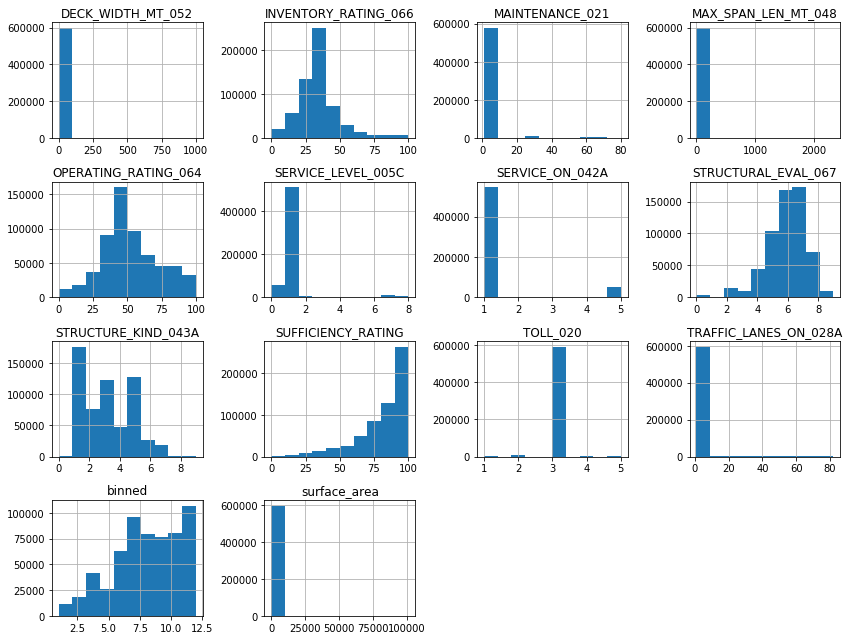

In [114]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

In [115]:
bridges99.head(2)

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned,surface_area
0,1.0,3,62,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10,142.59
1,1.0,3,62,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11,126.42


**NOW THAT ALL TOLL VALUES ARE IDENTICAL  -- TOLL  CONTRIBUTES NOTHING TO MODEL SO DROP** 

In [0]:
bridges99.drop('TOLL_020',axis=1,inplace=True)

In [117]:
bridges99.head()

,SERVICE_LEVEL_005C,MAINTENANCE_021,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned,surface_area
0,1.0,62,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10,142.59
1,1.0,62,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11,126.42
2,1.0,74,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,5,164.70
3,1.0,67,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,8,147.00
4,1.0,67,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,4,415.74


**6.1 METERS IS FEDERAL MINIMUM TO BE A BRIDGE**

**REMOVE BRIDGES LESS THAN 6.1 METERS MAIN SPAN**  (152,926)

**About 25% of the listed bridges meet state definitions of a bridge. I am only looking at those that meet the federal definition**.

In [0]:
bridges99=bridges99[bridges99['MAX_SPAN_LEN_MT_048']>=6.1]

In [119]:
bridges99.shape

(446852, 22)

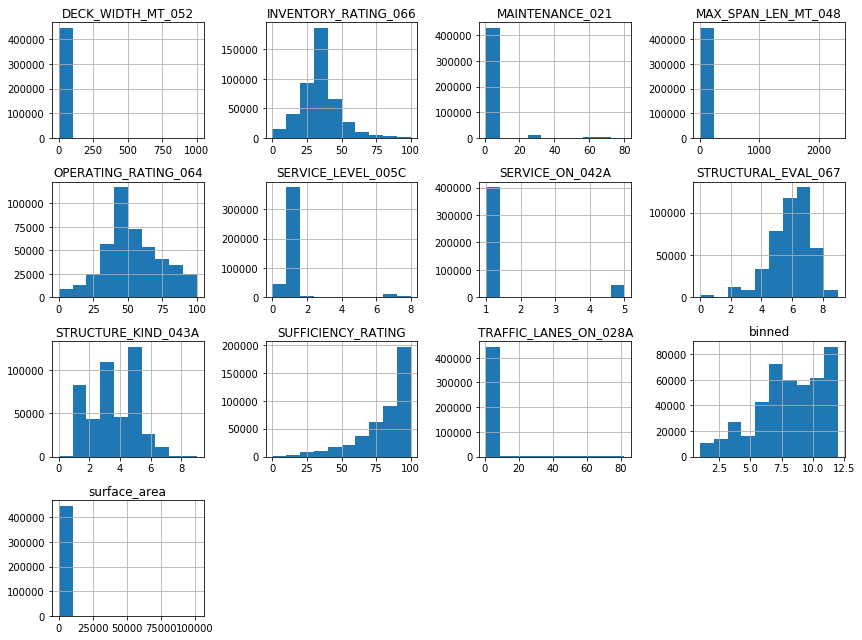

In [120]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

In [121]:
bridges99.shape

(446852, 22)

**SOME CRAZY NUMBERS IN LANE COUNT LIKE 80 LANES --  TYPOS?**

**WILL KEEP TOP 4 SUBCATEGORIES -- 1,2,3,4 lanes -- THEY MAKE UP OVER 95% OF VALUES**

In [122]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts()

2.0     351711
1.0      34567
4.0      25124
3.0      17939
5.0       6310
6.0       5988
8.0       1739
7.0       1474
10.0       711
9.0        537
12.0       267
11.0       231
13.0        92
14.0        79
20.0        31
15.0        15
16.0        10
40.0         5
50.0         5
17.0         4
45.0         2
18.0         2
19.0         1
70.0         1
80.0         1
82.0         1
21.0         1
30.0         1
25.0         1
22.0         1
60.0         1
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [123]:
bridges99['SERVICE_ON_042A'].value_counts()

1    401557
5     45295
Name: SERVICE_ON_042A, dtype: int64

In [0]:
bridges99=bridges99[(bridges99['TRAFFIC_LANES_ON_028A']==1) | (bridges99['TRAFFIC_LANES_ON_028A']==2) |(bridges99['TRAFFIC_LANES_ON_028A']==3)| (bridges99['TRAFFIC_LANES_ON_028A']==4)]

In [125]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts()

2.0    351711
1.0     34567
4.0     25124
3.0     17939
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [126]:
bridges99.shape

(429341, 22)

**CREATING SUBSET OF NUMERICAL FEATURES**

In [0]:
n=[col for col in list(bridges99) if bridges99[col].dtype!=object]

**USE Z-SCORE TO CHECK FOR OUTLIERS**

In [128]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bridges99[n]))
z1=(z>1)
z2=(z>2)
print(z)

[[0.12578118 6.75849536 0.13231737 ... 0.97798799 0.77148798 0.26478349]
 [0.12578118 6.75849536 0.13231737 ... 0.97798799 1.16194695 0.32532355]
 [0.12578118 8.14000539 0.13231737 ... 0.61797267 1.18080687 0.18200423]
 ...
 [0.12578118 6.87362119 0.13231737 ... 0.16692602 1.55240592 0.35048306]
 [0.92104251 6.87362119 0.13231737 ... 0.86810218 1.55240592 0.2005369 ]
 [0.12578118 6.87362119 0.13231737 ... 0.11459944 1.55240592 0.41450502]]


In [129]:
z1

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ..., False,  True, False]])

**YES- THERE ARE OUTLIERS**

**BOXPLOTS FOR 13 CONTINUOUS VARIABLES**

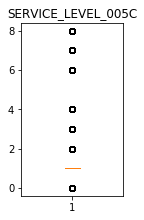

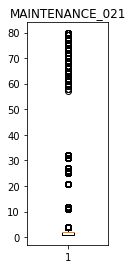

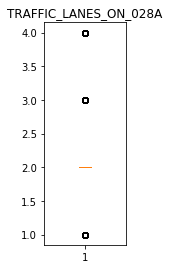

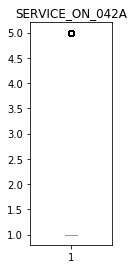

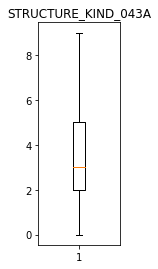

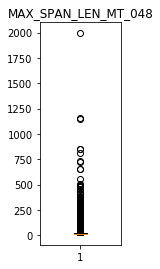

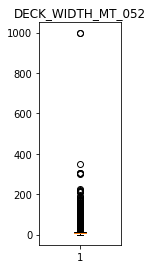

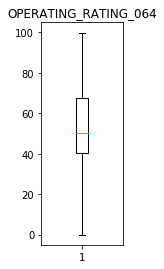

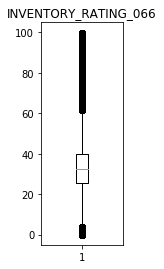

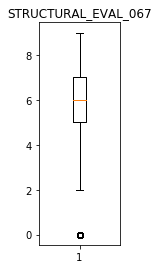

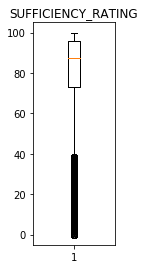

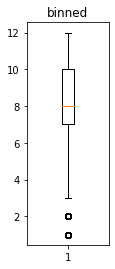

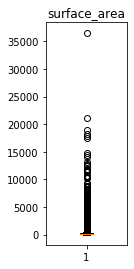

In [130]:
plt.figure(figsize=(15,7))
i=0
for col in n:  
  i=1+1
  plt.subplot(2,7,i)
  plt.boxplot(bridges99[col])
  plt.title(col)
  plt.show()  

**Winsorize TO REMOVE OUTLIERS**

In [0]:
from scipy.stats.mstats import winsorize

In [0]:
for col in n:  
  bridges99[col] = winsorize(bridges99[col], (.0,.05))

**BOXPLOTS AFTER WINSORIZATION**

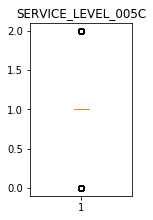

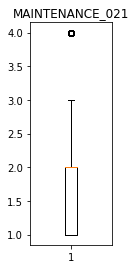

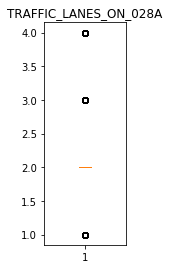

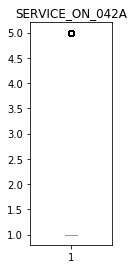

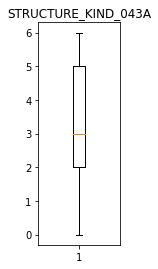

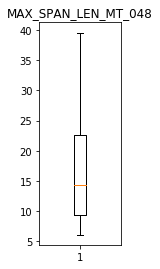

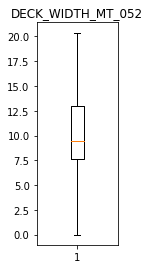

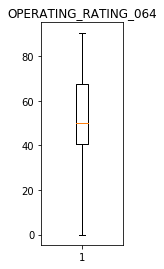

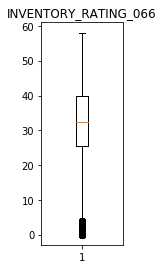

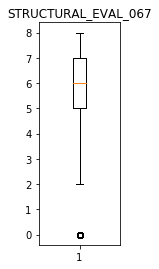

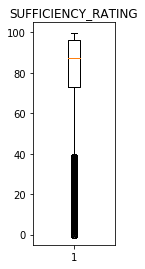

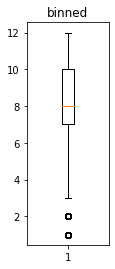

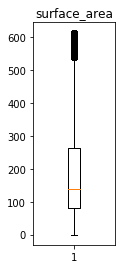

In [133]:
plt.figure(figsize=(15,7))
i=0
for col in n:  
  i=1+1
  plt.subplot(2,7,i)
  plt.boxplot(bridges99[col])
  plt.title(col)
  plt.show()  

**BIVARIATE ANALYSIS**



In [134]:
bridges99[n].corr()

,SERVICE_LEVEL_005C,MAINTENANCE_021,TRAFFIC_LANES_ON_028A,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,SUFFICIENCY_RATING,binned,surface_area
SERVICE_LEVEL_005C,1.000000,-0.221978,-0.029479,-0.137414,0.033739,0.093939,0.013463,-0.023350,-0.002453,0.033872,0.050100,0.061629,0.071879
MAINTENANCE_021,-0.221978,1.000000,-0.065391,0.169868,-0.015911,-0.171673,-0.157629,-0.150245,-0.124051,-0.058382,-0.081402,0.012342,-0.192503
TRAFFIC_LANES_ON_028A,-0.029479,-0.065391,1.000000,0.220627,0.035224,0.195395,0.638621,0.160031,0.159097,0.148967,0.137780,0.071817,0.473612
SERVICE_ON_042A,-0.137414,0.169868,0.220627,1.000000,-0.001500,0.106726,0.314332,0.086859,0.070022,0.001677,-0.037991,-0.057298,0.220141
STRUCTURE_KIND_043A,0.033739,-0.015911,0.035224,-0.001500,1.000000,0.353764,0.136957,0.125111,0.119822,0.168564,0.165650,0.290480,0.305907
MAX_SPAN_LEN_MT_048,0.093939,-0.171673,0.195395,0.106726,0.353764,1.000000,0.393636,0.224239,0.192054,0.195361,0.161746,0.220399,0.875280
DECK_WIDTH_MT_052,0.013463,-0.157629,0.638621,0.314332,0.136957,0.393636,1.000000,0.273999,0.261904,0.242201,0.290099,0.138874,0.726814
OPERATING_RATING_064,-0.023350,-0.150245,0.160031,0.086859,0.125111,0.224239,0.273999,1.000000,0.907406,0.548837,0.555840,0.320917,0.277503
INVENTORY_RATING_066,-0.002453,-0.124051,0.159097,0.070022,0.119822,0.192054,0.261904,0.907406,1.000000,0.626939,0.621697,0.374487,0.251525
STRUCTURAL_EVAL_067,0.033872,-0.058382,0.148967,0.001677,0.168564,0.195361,0.242201,0.548837,0.626939,1.000000,0.826158,0.575416,0.236134


**HEATMAP**

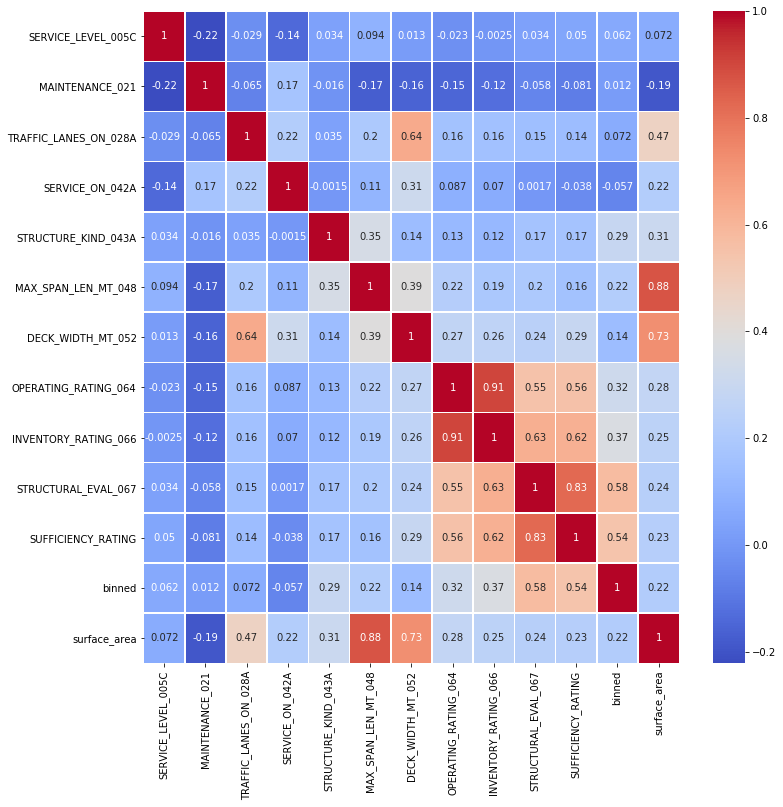

In [135]:
plt.figure(figsize=(12,12))
sns.heatmap(bridges99[n].corr(),annot=True,linewidth=0.5,cmap='coolwarm')

**OVERALL NOT MUCH CORREALTION -- I WILL DROP OPERATOR RATING .88 CORRELATION WITH INVENTORY RATING**

In [0]:
bridges99.drop(['OPERATING_RATING_064'],axis=1,inplace=True)

In [137]:
bridges99.shape

(429341, 21)

  **CREATING SUBSET OF OBJECT FEATURES**

In [138]:
k=[col for col in list(bridges99) if bridges99[col].dtype==object]
k

['DESIGN_LOAD_031',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060',
 'DECK_GEOMETRY_EVAL_068',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C']

**GET VALUE_COUNT GETS FOR ALL CATEGORICALS**

In [139]:
for col in k:
  print(col)
  print(bridges99[col].value_counts())
  print('')

DESIGN_LOAD_031
5    171103
0     77826
6     45095
2     34994
4     31831
9     26342
A     16987
1     15080
3      7746
C      1419
B       840
8        64
7        14
Name: DESIGN_LOAD_031, dtype: int64

DECK_COND_058
7    168582
6     97477
8     68432
5     48227
N     19696
9     11884
4     11810
3      2213
0       602
2       338
1        80
Name: DECK_COND_058, dtype: int64

SUPERSTRUCTURE_COND_059
7    149850
6     92993
8     91063
5     48257
N     15075
9     14526
4     13537
3      2755
0       608
2       508
1       169
Name: SUPERSTRUCTURE_COND_059, dtype: int64

SUBSTRUCTURE_COND_060
7    157724
6     95323
8     77522
5     50827
N     15201
4     15041
9     12457
3      3580
2       901
0       615
1       150
Name: SUBSTRUCTURE_COND_060, dtype: int64

DECK_GEOMETRY_EVAL_068
6    95775
5    95557
4    74724
7    53427
9    31982
2    30189
3    26643
N    10502
8    10054
0      485
*        3
Name: DECK_GEOMETRY_EVAL_068, dtype: int64

DECK_STRUCTURE_TYPE_107


In [0]:
#list(bridges99)

**CHANGE TARGET TO BINARY**

In [0]:
bridges99['STRUCTURAL_EVAL_067']=np.where(bridges99['STRUCTURAL_EVAL_067']<5,1,0)

In [141]:
bridges99['STRUCTURAL_EVAL_067'].value_counts()

0    374505
1     54836
Name: STRUCTURAL_EVAL_067, dtype: int64

**TARGET**

In [0]:
y=bridges99['STRUCTURAL_EVAL_067']

**DROP COLUMNS HIGHLY CORRELATED WITH TARGET**

In [0]:
X2=bridges99.drop(['STRUCTURAL_EVAL_067','SUFFICIENCY_RATING','SUBSTRUCTURE_COND_060'],axis=1)

**ONE-HOT ENCODE**

In [0]:
X2_dummy=pd.get_dummies(X2,drop_first=True)

**TRAIN_TEST_SPLIT**

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X2_dummy, y, test_size = 0.2, random_state = 42)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**`GRIDSEARCH**

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,8],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3,5,8],
    'min_samples_split': [8,12],
    'n_estimators': [10, 20,30]
}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=param_grid, refit = True, verbose = 3) 

In [148]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.873, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.873, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.873, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.875, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.872, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.873, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, ma

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 23.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [149]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'bootstrap': True, 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 30}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [150]:
rfc=RandomForestClassifier(max_depth=8,max_features=4,min_samples_leaf=5,min_samples_split=12,n_estimators=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print('Train recall: {:.5f}'.format(recall_score(y_train, y_train_pred)))
print('Test recall: {:.5f}'.format(recall_score(y_test, y_pred)))
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('ROC-AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

Train recall: 0.30418
Test recall: 0.29951


,0,1
0,299528,26
1,30559,13359


,0,1
0,74937,14
1,7648,3270


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     74951
           1       1.00      0.30      0.46     10918

    accuracy                           0.91     85869
   macro avg       0.95      0.65      0.71     85869
weighted avg       0.92      0.91      0.89     85869

ROC-AUC: 0.64966


#**RANDOMFOREST**

**RESULTS**

In [0]:
rfC_predictions = rfc.predict(X_test)

In [0]:
y2_pred=rfC_predictions

In [158]:
cnf_matrix = metrics.confusion_matrix(y_test, y2_pred)
cnf_matrix

array([[74937,    14],
       [ 7648,  3270]])

Text(0.5, 574.24, 'Predicted label')

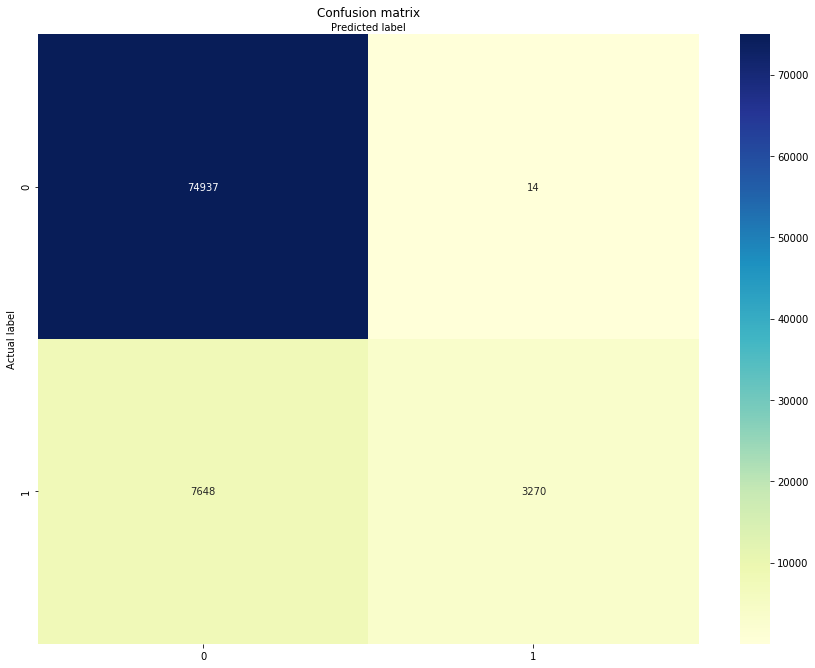

In [157]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap='CMRmap_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [159]:
cm = pd.DataFrame(confusion_matrix(y_test, rfC_predictions))
cm

,0,1
0,74937,14
1,7648,3270


In [160]:
rfc.score(X_train,y_train)

0.9109534401639726

In [161]:
rfc.score(X_test,y_test)

0.910771058239877

In [0]:
train_probs = rfc.predict_proba(X_train)
test_probs = rfc.predict_proba(X_test)

LOG_LOSS TRAIN

LOG_LOG TEST

In [164]:
log_loss(y_train, train_probs)

0.21141765487690317

In [0]:
from sklearn.metrics import confusion_matrix, log_loss

In [165]:
log_loss(y_test, test_probs)

0.21307268806800025

In [166]:
# answer below:
important_features_dict = {}
for x,i in enumerate(rfc.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [7, 35, 25, 6, 8, 34, 67, 58, 2, 26, 14, 39, 28, 36, 4, 1, 24, 77, 38, 9, 29, 5, 61, 11, 44, 15, 18, 33, 68, 10, 43, 42, 37, 66, 45, 40, 27, 85, 41, 52, 50, 30, 23, 74, 47, 19, 63, 48, 62, 0, 72, 60, 70, 51, 83, 3, 32, 53, 21, 69, 56, 13, 64, 49, 59, 75, 55, 12, 46, 71, 73, 76, 31, 82, 84, 54, 20, 65, 79, 78, 57, 81, 80, 16, 17, 22]


//////////////////////////////////////////////////////////////////////////////////////////////////////////


In [0]:
importances = rfc.feature_importances_

In [0]:
indices = np.argsort(importances)

In [0]:
features = X2_dummy.columns

In [170]:
features[indices]


Index(['DECK_COND_058_1', 'DESIGN_LOAD_031_8', 'DESIGN_LOAD_031_7',
       'DECK_PROTECTION_108C_4', 'DECK_PROTECTION_108C_6',
       'DECK_STRUCTURE_TYPE_107_7', 'DECK_PROTECTION_108C_2',
       'DECK_PROTECTION_108C_3', 'SURFACE_TYPE_108A_5', 'DESIGN_LOAD_031_B',
       'DECK_STRUCTURE_TYPE_107_4', 'DECK_PROTECTION_108C_9',
       'DECK_PROTECTION_108C_7', 'DECK_COND_058_N', 'MEMBRANE_TYPE_108B_N',
       'MEMBRANE_TYPE_108B_3', 'MEMBRANE_TYPE_108B_1',
       'DECK_GEOMETRY_EVAL_068_5', 'DESIGN_LOAD_031_3',
       'DECK_STRUCTURE_TYPE_107_5', 'MEMBRANE_TYPE_108B_9',
       'DECK_STRUCTURE_TYPE_107_9', 'DECK_GEOMETRY_EVAL_068_8',
       'SURFACE_TYPE_108A_4', 'DESIGN_LOAD_031_4', 'DECK_STRUCTURE_TYPE_107_6',
       'SURFACE_TYPE_108A_9', 'DESIGN_LOAD_031_C', 'DECK_STRUCTURE_TYPE_107_3',
       'SUPERSTRUCTURE_COND_059_1', 'SERVICE_ON_042A',
       'DECK_PROTECTION_108C_8', 'DECK_GEOMETRY_EVAL_068_N',
       'SURFACE_TYPE_108A_N', 'DECK_STRUCTURE_TYPE_107_N',
       'MEMBRANE_TYPE_108B

**PLOT OF FEATURE IMPORTANCE**

Text(0.5, 0, 'Relative Importance')

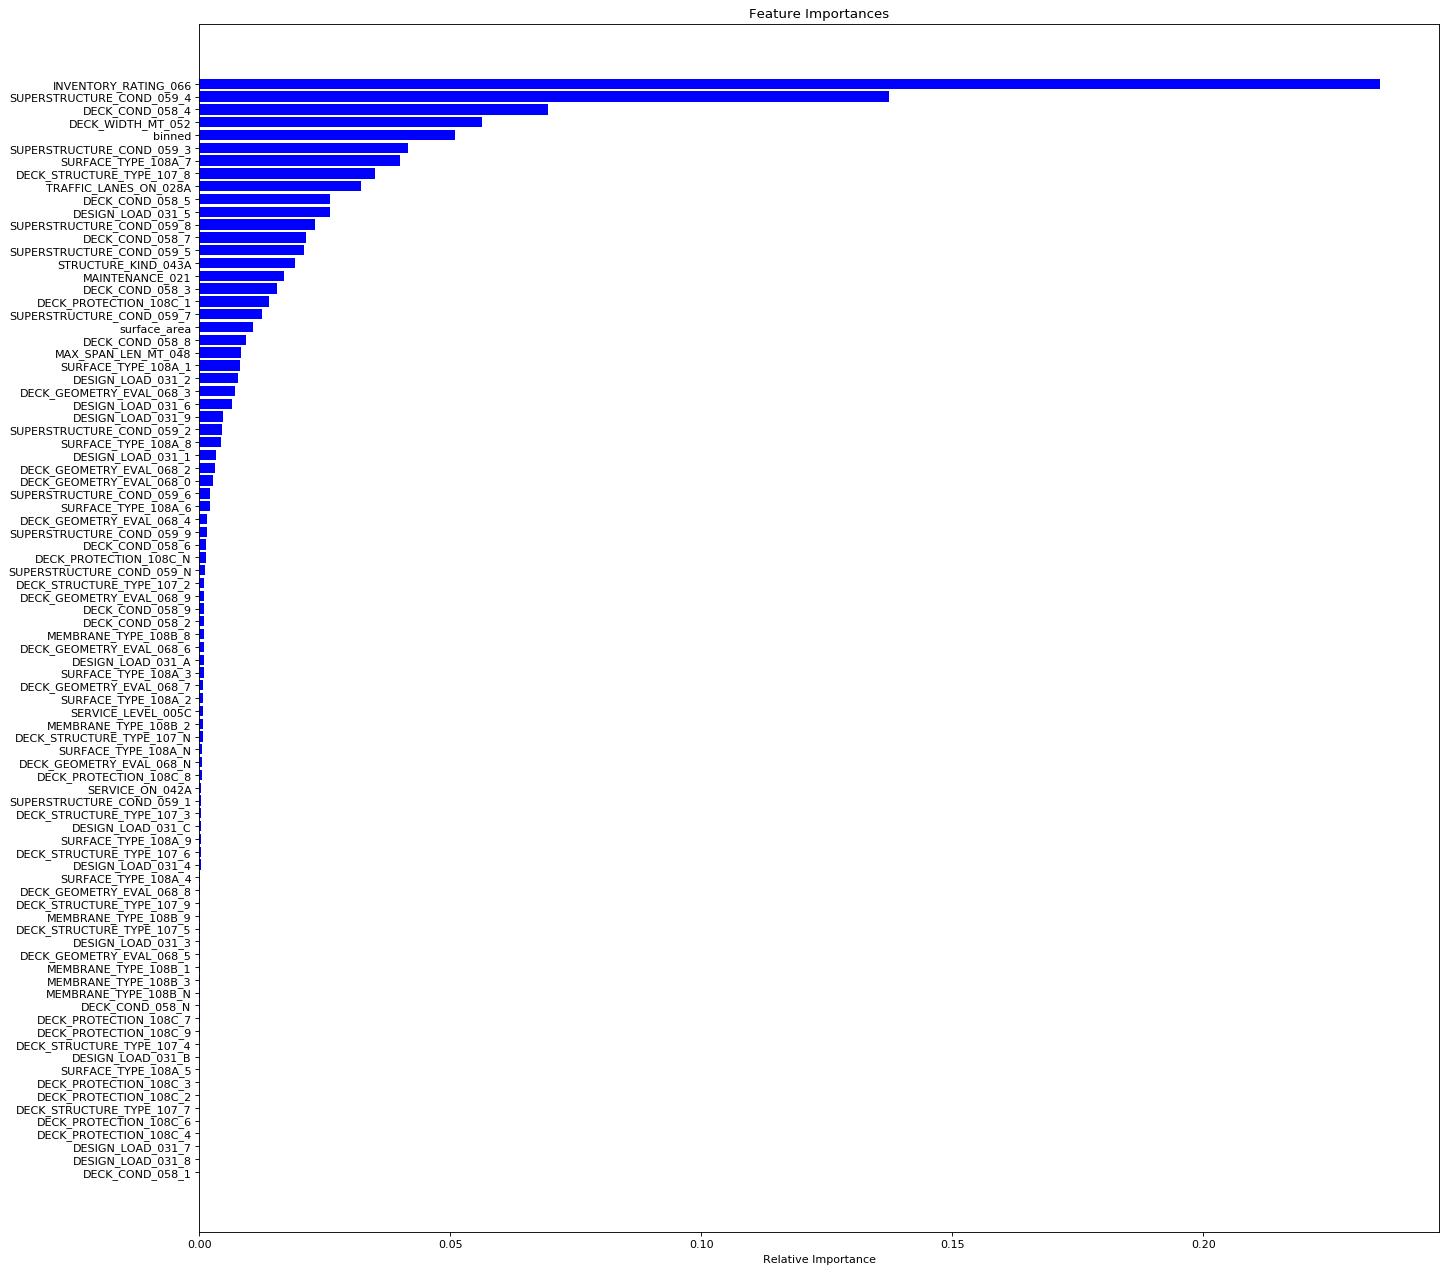

In [171]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,20), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

//////////////////////////////////////////////////////////////////////////////////////////////////////

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#**LOGISTIC REGRESSION**

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
logistic = linear_model.LogisticRegression(solver='liblinear')

In [173]:
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logistic_predictions = logistic.predict(X_test)


In [175]:
y_train_pred = logistic.predict(X_train)
y_pred = logistic.predict(X_test)
print('Train recall: {:.5f}'.format(recall_score(y_train, y_train_pred)))
print('Test recall: {:.5f}'.format(recall_score(y_test, y_pred)))
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('ROC-AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

Train recall: 0.76968
Test recall: 0.76305


,0,1
0,296968,2586
1,10115,33803


,0,1
0,74282,669
1,2587,8331


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     74951
           1       0.93      0.76      0.84     10918

    accuracy                           0.96     85869
   macro avg       0.95      0.88      0.91     85869
weighted avg       0.96      0.96      0.96     85869

ROC-AUC: 0.87706


In [0]:
y_pred=logistic_predictions

In [0]:
Predictions =logistic_predictions

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     75003
           1       0.93      0.77      0.84     10866

    accuracy                           0.96     85869
   macro avg       0.95      0.88      0.91     85869
weighted avg       0.96      0.96      0.96     85869



In [178]:
print('ROC-AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

ROC-AUC: 0.87706


**CONFUSION MATRIX**

In [179]:
cm = pd.DataFrame(confusion_matrix(y_test, logistic_predictions))
cm

,0,1
0,74282,669
1,2587,8331


In [180]:
logistic.score(X_train,y_train)

0.9630217310290213

In [181]:
logistic.score(X_test,y_test)

0.962081775728144

In [0]:
train_probs = logistic.predict_proba(X_train)
test_probs = logistic.predict_proba(X_test)

**`LOG_LOSS`**

In [183]:
log_loss(y_train, train_probs)

0.127800596425521

In [184]:
log_loss(y_test, test_probs)

0.1299776667449525

In [185]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[74282,   669],
       [ 2587,  8331]])

Text(0.5, 574.24, 'Predicted label')

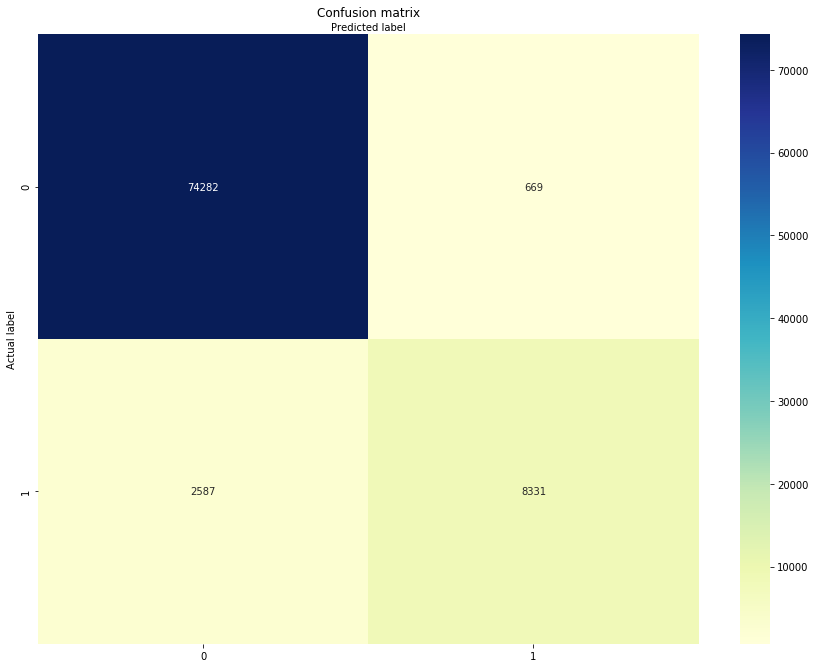

In [186]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**CONCLUSION -- LOGISITIC REGRESSION IS BEST MODEL FOR THIS CLASSIFICATION PROBLEM**

**HIGHER ACCURACY -- LOWER LOG_LOSS**

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

**IN THIS RE-RUN I'VE DROPPED ALL FEATURES THAT REQUIRE ONSITE HUMAN EVEALUATION**

In [189]:
list(X2)

['SERVICE_LEVEL_005C',
 'MAINTENANCE_021',
 'TRAFFIC_LANES_ON_028A',
 'DESIGN_LOAD_031',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'MAX_SPAN_LEN_MT_048',
 'DECK_WIDTH_MT_052',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'INVENTORY_RATING_066',
 'DECK_GEOMETRY_EVAL_068',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C',
 'binned',
 'surface_area']

**DROP ALL COLUMNS THAT REQUIRE A VISIT TO THE BRIDGE**



In [0]:
X2=X2.drop(['DECK_COND_058','SUPERSTRUCTURE_COND_059','INVENTORY_RATING_066'],axis=1)

In [0]:
X2_dummy=pd.get_dummies(X2,drop_first=True)

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X2_dummy, y, test_size = 0.2, random_state = 42)

**LOGISTIC REGRESSION**

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from scipy.stats import uniform

In [195]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=100,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [0]:
logistic = linear_model.LogisticRegression(solver='saga',C=2.195254015709299,penalty='l1')

In [200]:
logistic.fit(X_train,y_train)

LogisticRegression(C=2.195254015709299, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logistic_predictions = logistic.predict(X_test)

In [202]:
y_train_pred = logistic.predict(X_train)
y_pred = logistic.predict(X_test)
print('Train recall: {:.5f}'.format(recall_score(y_train, y_train_pred)))
print('Test recall: {:.5f}'.format(recall_score(y_test, y_pred)))
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('ROC-AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

Train recall: 0.29999
Test recall: 0.28943


,0,1
0,292153,7401
1,30743,13175


,0,1
0,73046,1905
1,7758,3160


              precision    recall  f1-score   support

           0       0.90      0.97      0.94     74951
           1       0.62      0.29      0.40     10918

    accuracy                           0.89     85869
   macro avg       0.76      0.63      0.67     85869
weighted avg       0.87      0.89      0.87     85869

ROC-AUC: 0.63201


In [203]:
cm = pd.DataFrame(confusion_matrix(y_test, logistic_predictions))
cm

,0,1
0,73046,1905
1,7758,3160


In [204]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[73046,  1905],
       [ 7758,  3160]])

Text(0.5, 574.24, 'Predicted label')

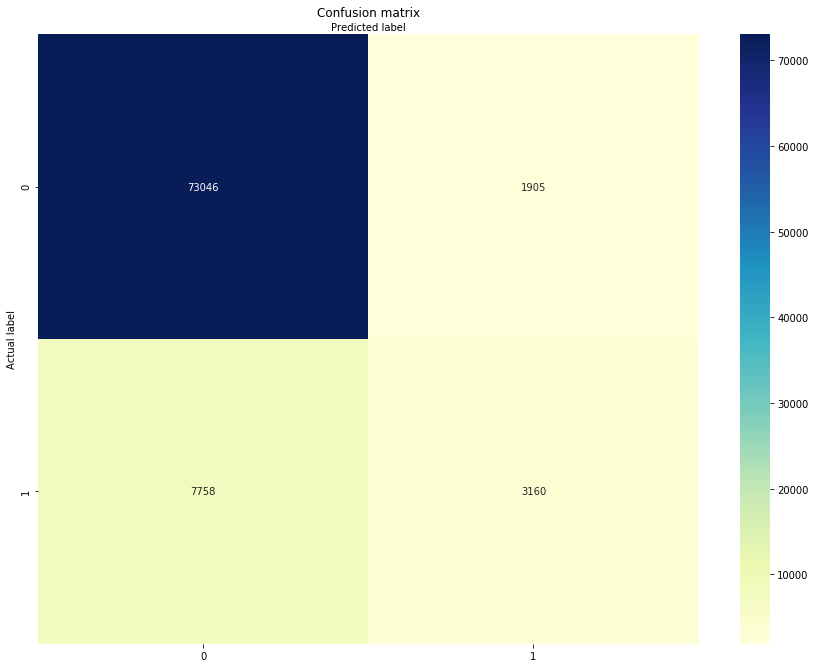

In [205]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
train_probs = logistic.predict_proba(X_train)
test_probs = logistic.predict_proba(X_test)

**LOG_LOSS**

In [207]:
log_loss(y_train, train_probs)

0.26971063208087254

In [0]:
log_loss(y_train, train_probs)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

**RANDOM FOREST**

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,8],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3,5,8],
    'min_samples_split': [8,12],
    'n_estimators': [10, 20,30]
}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=param_grid, refit = True, verbose = 3) 

In [221]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.872, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.872, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.872, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.872, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.872, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.872, total=   1.7s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, ma

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 19.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [222]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'bootstrap': True, 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 30}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [235]:
rfc=RandomForestClassifier(max_depth=8,max_features=4,min_samples_leaf=3,min_samples_split=8,n_estimators=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [236]:
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print('Train recall: {:.5f}'.format(recall_score(y_train, y_train_pred)))
print('Test recall: {:.5f}'.format(recall_score(y_test, y_pred)))
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('ROC-AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

Train recall: 0.10529
Test recall: 0.10359


,0,1
0,298541,1013
1,39294,4624


,0,1
0,74677,274
1,9787,1131


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     74951
           1       0.80      0.10      0.18     10918

    accuracy                           0.88     85869
   macro avg       0.84      0.55      0.56     85869
weighted avg       0.87      0.88      0.84     85869

ROC-AUC: 0.54997


In [0]:
train_probs = rfc.predict_proba(X_train)
test_probs = rfc.predict_proba(X_test)

LOG_LOSS TRAIN

LOG_LOSS TEST

In [226]:
log_loss(y_train, train_probs)

0.28689186147200907

In [227]:
log_loss(y_test, test_probs)

0.29023094573392016

In [0]:
importances = rfc.feature_importances_

In [0]:
indices = np.argsort(importances)

In [0]:
features = X2_dummy.columns

Text(0.5, 0, 'Relative Importance')

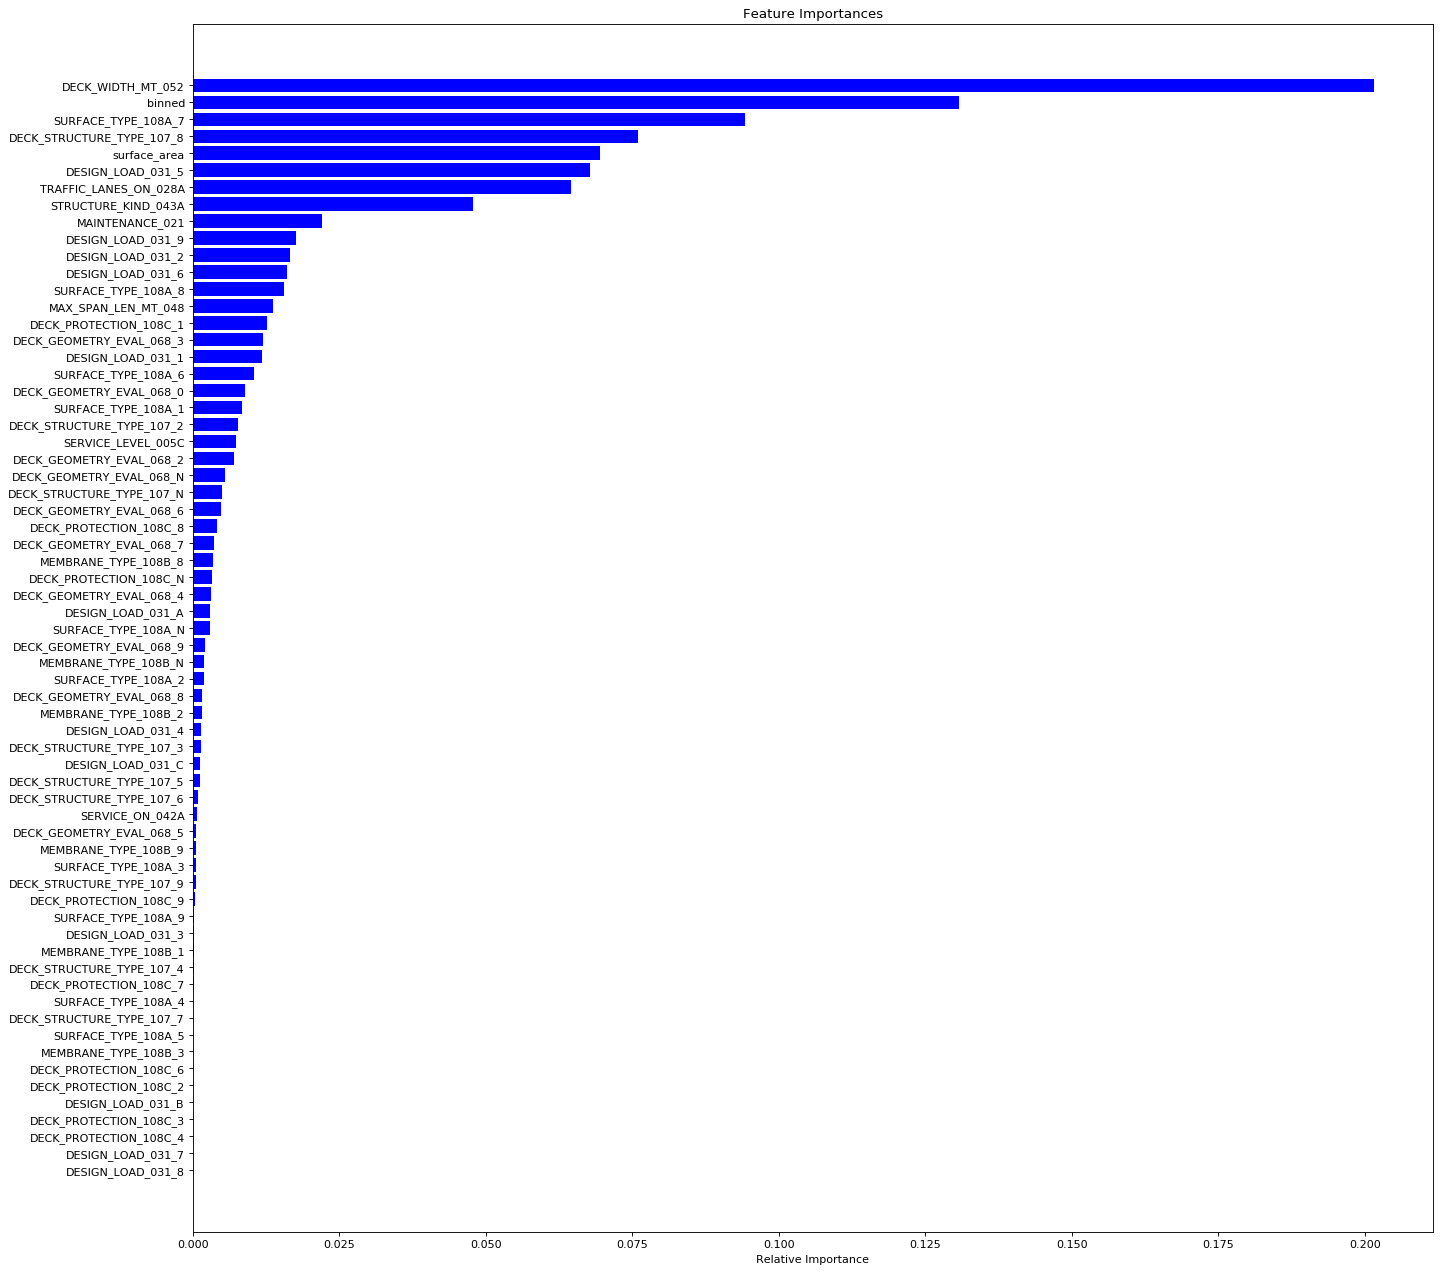

In [231]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,20), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [0]:
rfC_predictions = rfc.predict(X_test)

In [0]:
y2_pred=rfC_predictions

In [0]:
y_pred = rfc.predict(X_test)

In [244]:
cnf_matrix = metrics.confusion_matrix(y_test, y2_pred)
cnf_matrix

array([[74677,   274],
       [ 9787,  1131]])

Text(0.5, 574.24, 'Predicted label')

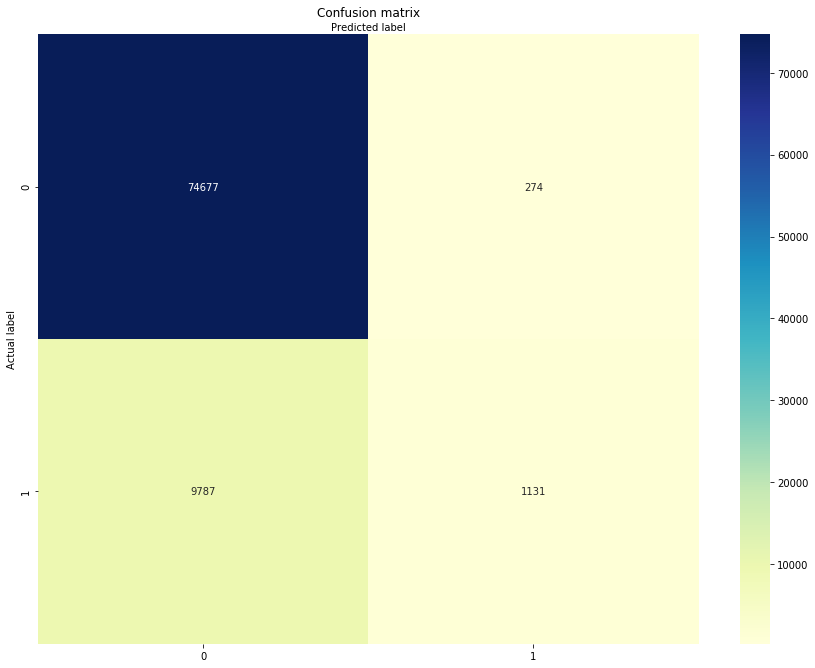

In [245]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

CONCLUSION/RECOMMENDATIONS

FEDERAL HIGHWAY ADMINISTRATION SHOULD MAKE BETTER USE OF THEIR MASSIVE DATABASE

WEAKNESSES

CONVERTING THE TARGET VARIABLE TO BINARY LEFT ME WITH TWO VERY UNBALANCED GROUPS

In [2]:
%%HTML
<iframe width='750' height='450' src='https://www.youtube.com/embed/84BeVq2Jm88?feature=player_detailpage' frameborder='0' allowfullscreen<>/iframe>  

In [ ]:
https://www.youtube.com/watch?v=lXyG68_caV4

In [9]:
<iframe width="787" height="590" src="https://www.youtube.com/embed/j-zczJXSxnw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

SyntaxError: invalid syntax (<ipython-input-9-cdf93a7e016c>, line 1)